In [58]:
####################################################################
###    This is the PYTHON version of program 6.4 from page 203 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model (including births and deaths) with full    #
### (event-driven) demographic stochasticity. Two forms of imports #
### (governed by the parameters epsilon and delta) are implemented.#
###																   #
### This is a more complex stochastic model as 8 events are		   #
### possible: infection, recovery, birth, death of susceptible,    #
### death of infected, death of recoveredand two forms of imports  #
###																   #
### Note: by default we are using a very small population size 	   #
### to highlight the stochasticity.				   				   #
####################################################################

In [59]:
import numpy as np
import pylab as pl
from matplotlib.font_manager import FontProperties as mfp

In [60]:
beta=1.0
gamma=1/10.0
mu=5e-4
#N0=5000.0
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
N0=50.0
delta=0.01;
epsilon=delta*10/N0;
ND=MaxTime=10*365.0
Y0=pl.ceil(mu*N0/gamma)
X0=pl.floor(gamma*N0/beta)
Z0=N0-X0-Y0

In [61]:
INPUT = np.array((X0,Y0,Z0, 0.0, 0.0))

timestep=0.0


In [62]:
def stoc_eqs(INP,ts): 
	V = INP
	Rate=np.zeros((8))
	Change=np.zeros((8,3))
	N=pl.sum(V[range(3)])
	Rate[0] = beta*V[0]*V[1]/N;  Change[0,:]=([-1, +1, 0]);
	Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1]);
	Rate[2] = mu*N;  Change[2,:]=([+1, 0, 0]);
	Rate[3] = mu*V[0];  Change[3,:]=([-1, 0, 0]);
	Rate[4] = mu*V[1];  Change[4,:]=([0, -1, 0]);
	Rate[5] = mu*V[2];  Change[5,:]=([0, 0, -1]);
	Rate[6] = epsilon*V[0];  Change[6,:]=[-1, +1, 0];
	Rate[7] = delta;  Change[7,:]=[0, +1, 0];
	R1=pl.rand();
	R2=pl.rand();
	ts = -np.log(R2)/(np.sum(Rate));
	m=min(np.where(pl.cumsum(Rate)>=R1*pl.sum(Rate))[0]);
	V[range(3)]=V[range(3)]+Change[m,:]
	V[3]=0; V[4]=0.;
	if m == 6: V[3] = 1.
	if m == 7: V[4] = 1.
	return [V,ts]

In [63]:
def Stoch_Iteration(INPUT):
	lop=0
	ts=0
	T=[0]
	S=[0]
	I=[0]
	R=[0]
	et=[]
	dt=[]
	while T[lop] < ND:
		lop=lop+1
		T.append(T[lop-1]+ts)
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		et.append(INPUT[3])
		dt.append(INPUT[4])
		[res,ts] = stoc_eqs(INPUT,ts)
		lop=lop+1
		INPUT = res
		T.append(T[lop-1])
		S.append(INPUT[0])
		I.append(INPUT[1])
		R.append(INPUT[2])
		et.append(INPUT[3])
		dt.append(INPUT[4])
		if lop>len(T):
			T[lop*2]=0
			S[lop*2]=0
			I[lop*2]=0
			R[lop*2]=0
			et[lop*2]=0
			dt[lop*2]=0
	return [T,S,I,R, et, dt]

In [64]:
[T,S,I,R, et, dt]=Stoch_Iteration(INPUT)

tT=np.array(T)[1:,]/365.
tS=np.array(S)[1:,]
tI=np.array(I)[1:,]
tR=np.array(R)[1:,]
indpl=np.where(tT<10)

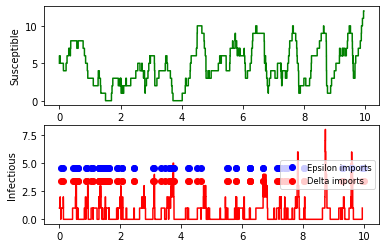

In [65]:
### plotting
pl.subplot(211)
h=pl.plot(tT[np.where(tT<10)], tS[np.where(tT<10)], 'g')
#pl.xlabel ('Time (years)')
pl.ylabel ('Susceptible')
pl.subplot(212)
pl.plot(tT[np.where(tT<10)], tI[np.where(tT<10)], 'r')
ax=pl.gca()
me=np.where(np.array(dt)>0)[0]
md=np.where(np.array(dt)>0)[0]
pl.plot(tT[me],np.zeros((len(me)))+ax.get_ylim()[0]+5, 'bo', linewidth=4, label='Epsilon imports')
pl.plot(tT[me],np.zeros((len(me)))+ax.get_ylim()[1]-5, 'ro', linewidth=4, label='Delta imports')
pl.legend(loc=7,prop=mfp(size='smaller'))
pl.ylabel ('Infectious')
pl.show()